In [1]:
import numpy as np
import matplotlib.pyplot as plt
from q_learning.algorithm import QLearningAlgo, QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from glob import glob
import pandas as pd
import torch

In [2]:
plt.rcParams["figure.figsize"] = [20, 12]

In [3]:
pl = QLPolicy.load('tmp/q_learning/q_policy_best_untrained_model_aeq_113421.pkl')
pl.q_table

{80869.0: array([159721.88727562, 160226.18974452, 160429.66750567, 160940.83574489,
        159381.22799454, 160824.08193187, 159974.01635139, 160041.54649163,
        160656.03587259, 159984.75857929, 160597.13645705, 160608.28828651,
        160268.35358437, 169660.96891889, 159649.79784187, 159830.99855157,
        159779.5019609 , 160768.46986599, 159346.69323146, 160172.40200732,
        159657.8591524 , 160939.79262161, 160469.27246306, 159389.62159419,
        160045.48217245, 159520.20807131, 159977.78122683])}

In [4]:
model = torch.load('tmp/state_quantization/untrained_model_aeq')
for param in model.parameters():
  print(param.data)

model = torch.load('tmp/state_quantization/untrained_model_h_c')
for param in model.parameters():
  print(param.data)

tensor([[ 3.1579e-02, -2.5188e-02,  7.2333e-03, -9.4958e-02, -9.9223e-02,
          6.2425e-02],
        [-1.0771e-01,  1.0782e-02,  1.4940e-01,  7.5721e-02,  1.0037e-02,
          1.0907e-01],
        [-1.8306e-01, -3.1058e-02, -1.5982e-01, -2.1813e-01, -2.1888e-01,
         -3.7062e-02],
        [ 1.0079e-01, -8.5818e-02, -4.4592e-02, -8.0833e-02, -1.9720e-01,
         -7.0798e-02],
        [-2.1848e-02,  5.7754e-02,  2.0305e-01,  1.4791e-01,  1.7984e-01,
         -9.8522e-03],
        [-1.7470e-01,  1.9063e-01,  5.3595e-02, -8.5756e-02,  7.5836e-05,
         -7.6561e-02],
        [ 1.8518e-01, -1.3546e-01, -1.5990e-02,  2.6165e-02, -1.8423e-01,
         -1.2173e-01],
        [ 1.3693e-01, -3.1416e-02, -8.5139e-02,  1.1730e-01,  7.1157e-02,
         -5.9751e-02],
        [-6.2131e-02, -1.0601e-01,  2.1523e-01,  8.1881e-02, -1.1758e-01,
          3.5122e-02],
        [-1.3258e-02, -5.9825e-03,  1.8689e-01, -1.9436e-01,  1.6434e-01,
         -1.9512e-01],
        [ 2.1671e-01,  4.5260e

In [5]:

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_h_c', 'model_final_h', 'model_aeq', 'model_final_h-new']
q_policies_path = 'tmp/q_learning'
model_files = {model_name: glob(f'{q_policies_path}/mb*{model_name}_*' ) for model_name in model_names}


Episode 24 Reward: -235.7324205241549 || New State Found: False


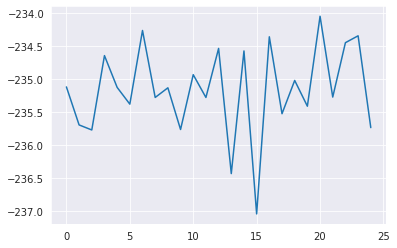

Reward Mean: -235.1626919557354
Reward std : 0.6847513239450331


In [6]:
benchmarks = {}
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = QLPolicy.load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs)
        evaluator.evaluate(epochs=25)

        benchmarks.update({policy_file.split('/')[-1].split('.')[0]: {'reward': np.mean(evaluator.eval_rewards_per_epoch), 'std':np.std(evaluator.eval_rewards_per_epoch)}})

In [7]:
#df = pd.concat({k: pd.DataFrame(v).T for k, v in benchmarks.items()}, axis=0)
df = pd.DataFrame(benchmarks).T
df

,reward,std
mb_q_policy_best_model_h_c_208197,-225.218058,2.172391
mb_q_policy_untrained_model_h_c_383301,-345.026811,90.311852
mb_q_policy_best_model_h_c_676923,-234.870245,1.450287
mb_q_policy_best_untrained_model_h_c_383301,-356.838594,126.847882
mb_q_policy_model_h_c_208197,-230.430677,3.802076
mb_q_policy_best_model_final_h_595275,-223.740462,0.926535
mb_q_policy_best_untrained_model_final_h_383301,-333.885010,78.792183
mb_q_policy_model_final_h_595275,-211.702669,5.009598
mb_q_policy_best_untrained_model_final_h_595275,-332.323397,94.184006
mb_q_policy_untrained_model_final_h_383301,-372.905419,138.043464


In [8]:
model_files

{'model_h_c': ['tmp/q_learning/mb_q_policy_best_model_h_c_208197.pkl',
  'tmp/q_learning/mb_q_policy_untrained_model_h_c_383301.pkl',
  'tmp/q_learning/mb_q_policy_best_model_h_c_676923.pkl',
  'tmp/q_learning/mb_q_policy_best_untrained_model_h_c_383301.pkl',
  'tmp/q_learning/mb_q_policy_model_h_c_208197.pkl'],
 'model_final_h': ['tmp/q_learning/mb_q_policy_best_model_final_h_595275.pkl',
  'tmp/q_learning/mb_q_policy_best_untrained_model_final_h_383301.pkl',
  'tmp/q_learning/mb_q_policy_model_final_h_595275.pkl',
  'tmp/q_learning/mb_q_policy_best_untrained_model_final_h_595275.pkl',
  'tmp/q_learning/mb_q_policy_untrained_model_final_h_383301.pkl',
  'tmp/q_learning/mb_q_policy_untrained_model_final_h_595275.pkl'],
 'model_aeq': ['tmp/q_learning/mb_q_policy_untrained_model_aeq_595275.pkl',
  'tmp/q_learning/mb_q_policy_best_model_aeq_208197.pkl',
  'tmp/q_learning/mb_q_policy_best_model_aeq_676923.pkl',
  'tmp/q_learning/mb_q_policy_model_aeq_676923.pkl',
  'tmp/q_learning/mb_q_pol

In [9]:
from envs.plot import plot_industrial_benchmark_trajectories

for benchmark in benchmarks:
    plot_industrial_benchmark_trajectories(benchmark.evaluators[-1].eval_trajectories[0]['info'])

AttributeError: 'str' object has no attribute 'evaluators'